In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importando Dados

In [37]:
df = pd.read_csv('PoliciaisMortos.csv', delimiter=';')
df = df[df['vano']>= 2015]
df

,CISP,mes,vano,pol_militares_mortos_serv,pol_civis_mortos_serv
19045,1,1,2015,0,0
19046,4,1,2015,0,0
19047,5,1,2015,0,0
19048,6,1,2015,1,0
19049,7,1,2015,0,0
...,...,...,...,...,...
32103,159,11,2022,0,0
32104,165,11,2022,0,0
32105,166,11,2022,0,0
32106,167,11,2022,0,0


## Analise Exploratória dos Dados
Descrevendo os Dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13063 entries, 19045 to 32107
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   CISP                       13063 non-null  int64
 1   mes                        13063 non-null  int64
 2   vano                       13063 non-null  int64
 3   pol_militares_mortos_serv  13063 non-null  int64
 4   pol_civis_mortos_serv      13063 non-null  int64
dtypes: int64(5)
memory usage: 612.3 KB


Transformando CISP, mes e vano em String

In [4]:
df[['CISP','mes','vano']] = df[['CISP','mes','vano']].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13063 entries, 19045 to 32107
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   CISP                       13063 non-null  object
 1   mes                        13063 non-null  object
 2   vano                       13063 non-null  object
 3   pol_militares_mortos_serv  13063 non-null  int64 
 4   pol_civis_mortos_serv      13063 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 612.3+ KB


+++++++++++++++++++++

### Resumo Anual -Baixas <br> 
Policia Militar e Civil

In [14]:
anual_df = df.groupby('vano').sum([['pol_militares_mortos_serv','pol_civis_mortos_serv']]).reset_index()
del_df = df.groupby('CISP').sum([['pol_militares_mortos_serv','pol_civis_mortos_serv']]).reset_index()

In [15]:
anual_df

,vano,pol_militares_mortos_serv,pol_civis_mortos_serv
0,2015,23,2
1,2016,38,2
2,2017,31,4
3,2018,28,4
4,2019,22,0
5,2020,14,5
6,2021,15,2
7,2022,15,2


In [28]:
a = anual_df.copy()
a['alvo_FUT'] = anual_df['pol_militares_mortos_serv'].shift(-1)
a = a.dropna()
a


,vano,pol_militares_mortos_serv,pol_civis_mortos_serv,alvo_FUT
0,2015,23,2,38.0
1,2016,38,2,31.0
2,2017,31,4,28.0
3,2018,28,4,22.0
4,2019,22,0,14.0
5,2020,14,5,15.0
6,2021,15,2,15.0


# Polícia Militar

<AxesSubplot: xlabel='vano'>

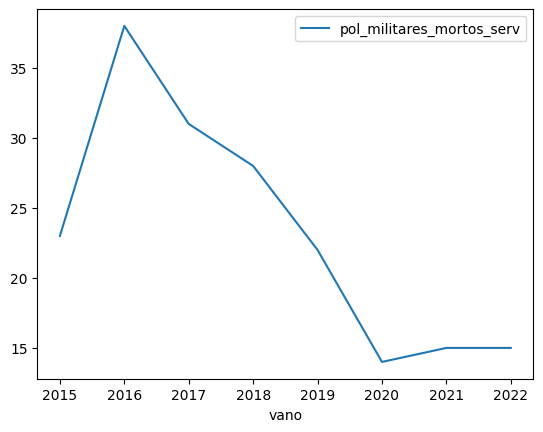

In [6]:
pm_anual = anual_df[['vano','pol_militares_mortos_serv']].set_index('vano')
sns.lineplot(data = pm_anual)



Possivel acompanhar queda acentuada na quantidade de mortes de Políciais Militares desde 2016 a 2020.

<br><br>
## Delegacias com maiores números de policiais neutralizados. <br>
As delegacias CISP 21 e 32 apresentaram o maior número de ocorrência de mortes de policiais militares nos últimos 8 anos. Cada uma com 11 ocorrências.

In [7]:
del_df[del_df['pol_militares_mortos_serv'] == del_df['pol_militares_mortos_serv'].max()]

,CISP,pol_militares_mortos_serv,pol_civis_mortos_serv
65,21,11,3
76,32,11,1


2016 foi o ano em que ocorreram mais baixas na mesma delegacia. 4 ocorrencias foram registradas nas delegacias 141 e 32, nos meses de Agosto e Setembro.

In [8]:
df[df['pol_militares_mortos_serv'] == df['pol_militares_mortos_serv'].max()]

,CISP,mes,vano,pol_militares_mortos_serv,pol_civis_mortos_serv
21784,141,8,2016,4,0
22109,32,11,2016,4,0


# Polícia Cívil

Pode-se observar uma queda acentuada no ano de 2018 a 2019, possívelmente motivado pela intervenção militar na cidade do Rio de Janeiro no ano de 2018. Em dezembro de 2018, foi decretada o fim da intervenção, o que favoreceu o aumento dos números de baixa de policiais, entre 2019 e 2020.

<AxesSubplot: xlabel='vano'>

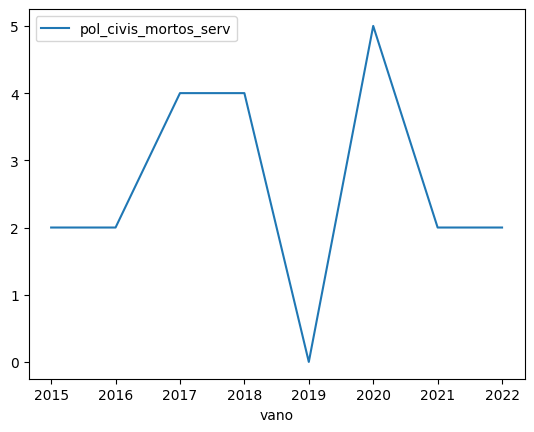

In [9]:
pc_anual = anual_df[['vano','pol_civis_mortos_serv']].set_index('vano')
sns.lineplot(data = pc_anual)

## Delegacias com maiores números de políciais Cívis neutralizados. <br>
A delegacia CISP 21 apresenta o maior número de ocorrência de mortes de policiais civis, totalizando 3 ocorrências nos últimos 8 anos<br>


In [10]:
del_df[del_df['pol_civis_mortos_serv'] == del_df['pol_civis_mortos_serv'].max()]

,CISP,pol_militares_mortos_serv,pol_civis_mortos_serv
65,21,11,3


A maior baixa por ano ocorreu em 2017, quando a delegacia CISP 123 registrou 2 ocorrências.

In [11]:
df[df['pol_civis_mortos_serv'] == df['pol_civis_mortos_serv'].max()]

,CISP,mes,vano,pol_militares_mortos_serv,pol_civis_mortos_serv
23562,123,9,2017,0,2


# Analise Estatística

In [12]:
anual_df.describe()

,pol_militares_mortos_serv,pol_civis_mortos_serv
count,8.000000,8.00000
mean,23.250000,2.62500
std,8.647873,1.59799
min,14.000000,0.00000
25%,15.000000,2.00000
50%,22.500000,2.00000
75%,28.750000,4.00000
max,38.000000,5.00000


### Linha do tempo - 8 últimos anos <br>
Separação por Partido Político

C:\Users\ozeas\AppData\Local\Temp\ipykernel_18408\1477908149.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=45)
C:\Users\ozeas\AppData\Local\Temp\ipykernel_18408\1477908149.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=45)
C:\Users\ozeas\AppData\Local\Temp\ipykernel_18408\1477908149.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


,vano,pol_militares_mortos_serv,pol_civis_mortos_serv
0,2015,23,2
1,2016,38,2
2,2017,31,4
3,2018,28,4
4,2019,22,0
5,2020,14,5
6,2021,15,2
7,2022,15,2


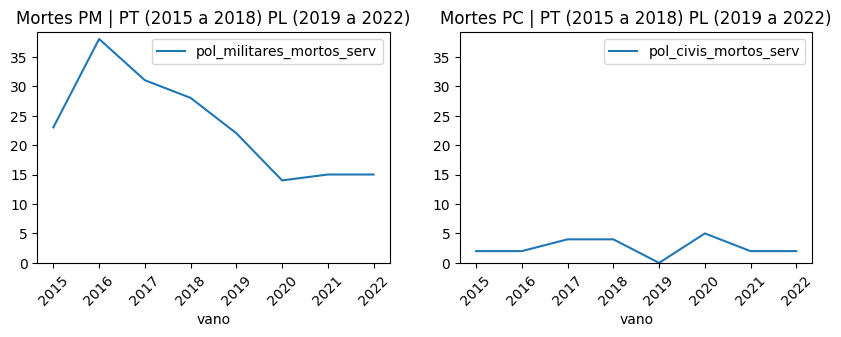

In [13]:
#Linha do Tempo
eixo = 0
max_y = 0

titulos = ['Mortes PM | PT (2015 a 2018) PL (2019 a 2022)', 'Mortes PC | PT (2015 a 2018) PL (2019 a 2022)']


coluna = 'Qtd de Mortes'

lst_dfs = [pm_anual, pc_anual]

figura, eixos = plt.subplots(1,2, figsize=(10, 3), sharex=True)

for dataframe in lst_dfs:
    f= sns.lineplot(data = dataframe, ax=eixos[eixo]) #roub_regiao[('total_roubos', 'Capital ')], ax=eixos[eixo])  
    
    f.set(title=titulos[eixo])
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=45)

    for i in f.containers:
       f.bar_label(i,)
   
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    
    
    eixo += 1
    
figura.show()


anual_df

In [38]:
df

,CISP,mes,vano,pol_militares_mortos_serv,pol_civis_mortos_serv
19045,1,1,2015,0,0
19046,4,1,2015,0,0
19047,5,1,2015,0,0
19048,6,1,2015,1,0
19049,7,1,2015,0,0
...,...,...,...,...,...
32103,159,11,2022,0,0
32104,165,11,2022,0,0
32105,166,11,2022,0,0
32106,167,11,2022,0,0


In [42]:
df[['mes','vano']] = df[['mes','vano']].astype('category')
df['CISP'] = df['CISP'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13063 entries, 19045 to 32107
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   CISP                       13063 non-null  object  
 1   mes                        13063 non-null  category
 2   vano                       13063 non-null  category
 3   pol_militares_mortos_serv  13063 non-null  int64   
 4   pol_civis_mortos_serv      13063 non-null  int64   
dtypes: category(2), int64(2), object(1)
memory usage: 434.5+ KB


In [46]:
df.groupby('vano').sum()

C:\Users\ozeas\AppData\Local\Temp\ipykernel_18408\3969034931.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('vano').sum()


,pol_militares_mortos_serv,pol_civis_mortos_serv
vano,,
2015,23,2
2016,38,2
2017,31,4
2018,28,4
2019,22,0
2020,14,5
2021,15,2
2022,15,2
